In [2]:
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import dask.dataframe as dd

from bokeh.io import output_notebook
output_notebook()
from bokeh.models import ColumnDataSource, Span
from bokeh.plotting import figure, show, output_file

from pandas import datetime
from sklearn.metrics import mean_squared_error
from math import sqrt
from matplotlib import pyplot

Loading BokehJS ...

In [3]:
customers = pd.read_csv('./data/customer_details.csv')
deliveries = pd.read_csv('./data/deliveries.csv')
colocations = pd.read_csv('./data/colocations.csv')
dataset_original = pd.read_csv('./data/level_readings.csv')

In [4]:
dataset_original.index = pd.to_datetime(dataset_original.ON_DATE_TIME, format='%Y-%m-%dT%H:%M:%S.%f')
dataset_original.ON_DATE_TIME = pd.to_datetime(dataset_original.ON_DATE_TIME, format='%Y-%m-%dT%H:%M:%S.%f')

# dataset_original = dataset_original.drop(columns="ON_DATE_TIME")
dataset_original.head()

,COUNTRY_CODE,INST_ID,INST_PRODUCT_AMOUNT,ON_DATE_TIME,VESSEL_ID
ON_DATE_TIME,,,,,
2017-10-02 00:59:00,MY,62,13870,2017-10-02 00:59:00,MY-62
2017-10-02 01:59:00,MY,62,18330,2017-10-02 01:59:00,MY-62
2017-10-02 02:59:00,MY,62,15367,2017-10-02 02:59:00,MY-62
2017-10-02 03:59:00,MY,62,13805,2017-10-02 03:59:00,MY-62
2017-10-02 04:59:00,MY,62,27870,2017-10-02 04:59:00,MY-62


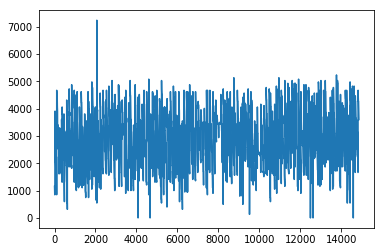

In [5]:
vessel = "CN-136070"
my_data = dataset_original[dataset_original.VESSEL_ID == vessel]
plt.plot(my_data.INST_PRODUCT_AMOUNT.values)

In [6]:
list_of_vessel_ids = deliveries.VESSEL_ID.unique().copy()
list_of_vessel_ids[:4]

array(['UK-3749', 'UK-3806', 'UK-41488', 'UK-63168'], dtype=object)

In [7]:
copy_of_vessel_ids = list_of_vessel_ids.copy()
# np.random.seed(42)
np.random.shuffle(copy_of_vessel_ids)
test_id = copy_of_vessel_ids[0]
copy_of_vessel_ids = copy_of_vessel_ids[1:]
training_id, validate_id = np.random.choice(copy_of_vessel_ids, 2, replace=False)
print(f"Training Vessel: {training_id}")
print(f"Validation Vessel: {validate_id}")
print(f"Test Vessel: {test_id}")
test_data = dataset_original[dataset_original.VESSEL_ID == test_id]
training_data = dataset_original[dataset_original.VESSEL_ID == training_id]
validate_data = dataset_original[dataset_original.VESSEL_ID == validate_id]
training_data.head()

Training Vessel: CN-150351
Validation Vessel: TH-2604
Test Vessel: MY-99786


,COUNTRY_CODE,INST_ID,INST_PRODUCT_AMOUNT,ON_DATE_TIME,VESSEL_ID
ON_DATE_TIME,,,,,
2017-11-07 04:59:00,CN,150351,2526,2017-11-07 04:59:00,CN-150351
2017-11-07 05:59:00,CN,150351,2526,2017-11-07 05:59:00,CN-150351
2017-11-07 06:59:00,CN,150351,2475,2017-11-07 06:59:00,CN-150351
2017-11-07 07:59:00,CN,150351,2475,2017-11-07 07:59:00,CN-150351
2017-11-07 08:59:00,CN,150351,2475,2017-11-07 08:59:00,CN-150351


In [8]:
# Let's load the required libs.
# We'll be using the Tensorflow backend (default).
import keras
from keras.models import Sequential
from keras.layers.recurrent import LSTM
from keras.layers.core import Dense, Activation, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.utils import shuffle

Using TensorFlow backend.


In [9]:
def create_window(data, window_size = 1):    
    data_s = data.copy()
    for i in range(window_size):
        data = pd.concat([data, data_s.shift(-(i + 1))], 
                            axis = 1)
        
    data.dropna(axis=0, inplace=True)
    return(data)

In [58]:
model2 = keras.models.load_model('../my_model_0_1_scale_window_size_50.h5')

In [94]:
# window_size = 50 

# series = dataset_original[dataset_original.VESSEL_ID == "CN-140691"].INST_PRODUCT_AMOUNT

# scaler = MinMaxScaler(feature_range = (-1, 1))
# scaled = scaler.fit_transform(series.values.reshape(-1,1))

# # Convert to data frame.
# series = pd.DataFrame(scaled)
# series = create_window(series, window_size)

# train_X = series.iloc[:, :-1]
# train_X = np.reshape(train_X.values, (train_X.shape[0], train_X.shape[1], 1))


# train_Y = series.iloc[:, -1]


# # Predict on test data.
# pred_test = model2.predict(train_X)
# print(pred_test)
# # Apply inverse transformation to get back true values.
# test_y_actual = scaler.inverse_transform(train_Y.values.reshape(train_Y.shape[0], 1))
# pred_test_actual = scaler.inverse_transform(pred_test.reshape(pred_test.shape[0], 1))

# print("MSE for predicted test set: %2f" % mean_squared_error(train_Y.values, pred_test))

# plt.figure(figsize = (15, 5))
# plt.plot(test_y_actual, label="True value")
# plt.plot(pred_test_actual, label="Predicted value")
# plt.xlabel("x")
# plt.ylabel("sin(x)")
# plt.title("Comparison true vs. predicted test set")
# plt.legend()
# plt.show()

In [10]:
model2 = keras.models.load_model('../my_model_0_1_scale_window_size_50.h5')

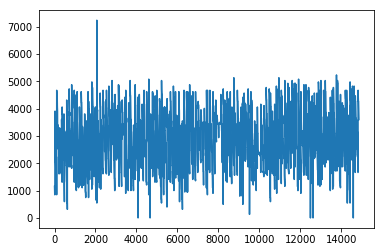

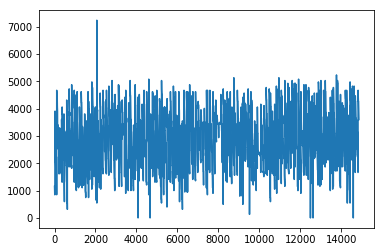

/glob/intel-python/versions/2018/intelpython3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


0: Predicted Scaled:[ 0.51778001] and Actual:[ 3748.20947266]
10: Predicted Scaled:[ 0.51807588] and Actual:[ 3750.35131836]
20: Predicted Scaled:[ 0.53914237] and Actual:[ 3902.8515625]
30: Predicted Scaled:[ 0.55566591] and Actual:[ 4022.46557617]
40: Predicted Scaled:[ 0.56439739] and Actual:[ 4085.67285156]
50: Predicted Scaled:[ 0.56791335] and Actual:[ 4111.125]
60: Predicted Scaled:[ 0.56885666] and Actual:[ 4117.953125]
70: Predicted Scaled:[ 0.56921369] and Actual:[ 4120.53808594]
80: Predicted Scaled:[ 0.56958681] and Actual:[ 4123.23876953]
90: Predicted Scaled:[ 0.57001919] and Actual:[ 4126.36865234]
100: Predicted Scaled:[ 0.57039112] and Actual:[ 4129.06152344]
110: Predicted Scaled:[ 0.57064414] and Actual:[ 4130.89306641]
120: Predicted Scaled:[ 0.57078713] and Actual:[ 4131.92822266]
130: Predicted Scaled:[ 0.57085979] and Actual:[ 4132.45410156]
140: Predicted Scaled:[ 0.57089722] and Actual:[ 4132.72509766]
150: Predicted Scaled:[ 0.57091987] and Actual:[ 4132.88916

NameError: name 'series_real_values' is not defined

In [15]:
prediction_iterations = 240
window_size = 50

series = my_data.INST_PRODUCT_AMOUNT
plt.plot(series.values)
plt.show()

original = series.copy()
plt.plot(original.values)
plt.show()

raw = create_window(series, window_size)

scaler = MinMaxScaler(feature_range = (0, 1))
scaled = scaler.fit_transform(series.values.reshape(-1,1))

# Convert to data frame.
series = pd.DataFrame(scaled)
series = create_window(series, window_size)

# window_size = 50

train_X = series.iloc[:, :-1]
train_backup = series.iloc[:, :-1]
raw_scaled = series.iloc[:, :-1]
train_X = np.reshape(train_X.values, (train_X.shape[0], train_X.shape[1], 1))
train_backup = np.reshape(train_backup.values, (train_backup.shape[0], train_backup.shape[1], 1))


train_Y = series.iloc[:, -1]



pred_list = []
pred_test = None

treshold = 30

# plt.plot(model2.predict(train_X[-i:].reshape(i,50,1)))

for i in range(prediction_iterations):
    if pred_test is not None:
        train_X = np.vstack([train_X, to_insert.reshape(1,window_size,1)])
    pred_test = model2.predict(train_X[-treshold:].reshape(treshold,window_size ,1))
    pred_test_actual = scaler.inverse_transform(pred_test.reshape(pred_test.shape[0], 1))
    to_insert = np.vstack([train_X[-1,1:], pred_test[-1]])
    if i % 10 == 0:
        print("{}: Predicted Scaled:{} and Actual:{}".format(i, pred_test[-1], pred_test_actual[-1]))
    pred_list.append(pred_test_actual[-1])


    


series_real_values = dataset_original[dataset_original.VESSEL_ID == vessel][-window_size:]
combined_series = pred_list
plt.plot(combined_series[-window_size:])
plt.plot(series_real_values.INST_PRODUCT_AMOUNT.values, c = 'r')

print(np.shape(pred_list))
print(np.shape(series_real_values.INST_PRODUCT_AMOUNT.values))


In [96]:
print(pred_test.shape)
print(train_X[-1,1].shape)
print(to_insert.shape)
print(f"{pred_test} - {to_insert[-1]}")
# print(np.array([train_backup[-1],to_insert]))


print(train_X.shape)
print(np.vstack([train_X, to_insert.reshape(1,window_size,1)]).shape)

(1, 1)
(1,)
(50, 1)
[[ 0.5709644]] - [ 0.5709644]
(15055, 50, 1)
(15056, 50, 1)


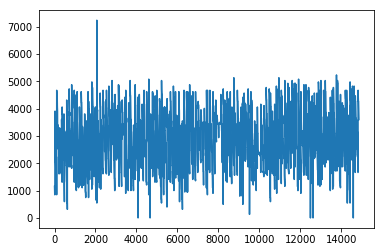

In [103]:
plt.plot(original.values)

In [85]:
raw

,INST_PRODUCT_AMOUNT,INST_PRODUCT_AMOUNT,INST_PRODUCT_AMOUNT,INST_PRODUCT_AMOUNT,INST_PRODUCT_AMOUNT,INST_PRODUCT_AMOUNT,INST_PRODUCT_AMOUNT,INST_PRODUCT_AMOUNT,INST_PRODUCT_AMOUNT,INST_PRODUCT_AMOUNT,...,INST_PRODUCT_AMOUNT,INST_PRODUCT_AMOUNT,INST_PRODUCT_AMOUNT,INST_PRODUCT_AMOUNT,INST_PRODUCT_AMOUNT,INST_PRODUCT_AMOUNT,INST_PRODUCT_AMOUNT,INST_PRODUCT_AMOUNT,INST_PRODUCT_AMOUNT,INST_PRODUCT_AMOUNT
ON_DATE_TIME,,,,,,,,,,,,,,,,,,,,,
2017-03-04 11:59:00,1156,1105.0,1054.0,952.0,952.0,901.0,850.0,850.0,850.0,850.0,...,2074.0,2074.0,2074.0,2023.0,2023.0,2074.0,2023.0,2023.0,2023.0,2023.0
2017-03-04 12:59:00,1105,1054.0,952.0,952.0,901.0,850.0,850.0,850.0,850.0,850.0,...,2074.0,2074.0,2023.0,2023.0,2074.0,2023.0,2023.0,2023.0,2023.0,2023.0
2017-03-04 13:59:00,1054,952.0,952.0,901.0,850.0,850.0,850.0,850.0,850.0,850.0,...,2074.0,2023.0,2023.0,2074.0,2023.0,2023.0,2023.0,2023.0,2023.0,2023.0
2017-03-04 14:59:00,952,952.0,901.0,850.0,850.0,850.0,850.0,850.0,850.0,850.0,...,2023.0,2023.0,2074.0,2023.0,2023.0,2023.0,2023.0,2023.0,2023.0,2023.0
2017-03-04 15:00:00,952,901.0,850.0,850.0,850.0,850.0,850.0,850.0,850.0,850.0,...,2023.0,2074.0,2023.0,2023.0,2023.0,2023.0,2023.0,2023.0,2023.0,2023.0
2017-03-04 15:59:00,901,850.0,850.0,850.0,850.0,850.0,850.0,850.0,850.0,850.0,...,2074.0,2023.0,2023.0,2023.0,2023.0,2023.0,2023.0,2023.0,2023.0,1972.0
2017-03-04 16:59:00,850,850.0,850.0,850.0,850.0,850.0,850.0,850.0,850.0,850.0,...,2023.0,2023.0,2023.0,2023.0,2023.0,2023.0,2023.0,2023.0,1972.0,1921.0
2017-03-04 17:59:00,850,850.0,850.0,850.0,850.0,850.0,850.0,850.0,850.0,850.0,...,2023.0,2023.0,2023.0,2023.0,2023.0,2023.0,2023.0,1972.0,1921.0,1819.0
2017-03-04 18:59:00,850,850.0,850.0,850.0,850.0,850.0,850.0,850.0,850.0,2380.0,...,2023.0,2023.0,2023.0,2023.0,2023.0,2023.0,1972.0,1921.0,1819.0,1819.0


In [78]:
raw_scaled

,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,-0.680619,-0.694709,-0.708800,-0.736980,-0.736980,-0.751071,-0.765161,-0.765161,-0.765161,-0.765161,...,-0.426993,-0.426993,-0.426993,-0.426993,-0.441083,-0.441083,-0.426993,-0.441083,-0.441083,-0.441083
1,-0.694709,-0.708800,-0.736980,-0.736980,-0.751071,-0.765161,-0.765161,-0.765161,-0.765161,-0.765161,...,-0.426993,-0.426993,-0.426993,-0.441083,-0.441083,-0.426993,-0.441083,-0.441083,-0.441083,-0.441083
2,-0.708800,-0.736980,-0.736980,-0.751071,-0.765161,-0.765161,-0.765161,-0.765161,-0.765161,-0.765161,...,-0.426993,-0.426993,-0.441083,-0.441083,-0.426993,-0.441083,-0.441083,-0.441083,-0.441083,-0.441083
3,-0.736980,-0.736980,-0.751071,-0.765161,-0.765161,-0.765161,-0.765161,-0.765161,-0.765161,-0.765161,...,-0.426993,-0.441083,-0.441083,-0.426993,-0.441083,-0.441083,-0.441083,-0.441083,-0.441083,-0.441083
4,-0.736980,-0.751071,-0.765161,-0.765161,-0.765161,-0.765161,-0.765161,-0.765161,-0.765161,-0.765161,...,-0.441083,-0.441083,-0.426993,-0.441083,-0.441083,-0.441083,-0.441083,-0.441083,-0.441083,-0.441083
5,-0.751071,-0.765161,-0.765161,-0.765161,-0.765161,-0.765161,-0.765161,-0.765161,-0.765161,-0.765161,...,-0.441083,-0.426993,-0.441083,-0.441083,-0.441083,-0.441083,-0.441083,-0.441083,-0.441083,-0.441083
6,-0.765161,-0.765161,-0.765161,-0.765161,-0.765161,-0.765161,-0.765161,-0.765161,-0.765161,-0.765161,...,-0.426993,-0.441083,-0.441083,-0.441083,-0.441083,-0.441083,-0.441083,-0.441083,-0.441083,-0.455173
7,-0.765161,-0.765161,-0.765161,-0.765161,-0.765161,-0.765161,-0.765161,-0.765161,-0.765161,-0.765161,...,-0.441083,-0.441083,-0.441083,-0.441083,-0.441083,-0.441083,-0.441083,-0.441083,-0.455173,-0.469264
8,-0.765161,-0.765161,-0.765161,-0.765161,-0.765161,-0.765161,-0.765161,-0.765161,-0.765161,-0.342451,...,-0.441083,-0.441083,-0.441083,-0.441083,-0.441083,-0.441083,-0.441083,-0.455173,-0.469264,-0.497444
9,-0.765161,-0.765161,-0.765161,-0.765161,-0.765161,-0.765161,-0.765161,-0.765161,-0.342451,0.079983,...,-0.441083,-0.441083,-0.441083,-0.441083,-0.441083,-0.441083,-0.455173,-0.469264,-0.497444,-0.497444


(50, 1)
(240,)


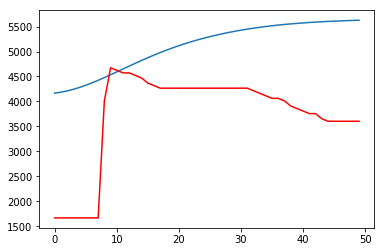

In [62]:
print(np.shape(pred_list))
print(np.shape(series_real_values.INST_PRODUCT_AMOUNT.values))

series_real_values = dataset_original[dataset_original.VESSEL_ID == vessel][-window_size:]
combined_series = pred_list
plt.plot(combined_series[-window_size:])
plt.plot(series_real_values.INST_PRODUCT_AMOUNT.values, c = 'r')